In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import perf_counter as T
from tqdm.notebook import tqdm
sns.set_style("white")


def D(prices,  C,  i):
    if (C == 0):
        return 1
    if (i >= len(prices)):
        return 0

    if (prices[i] > C):
        return D(prices, C, i + 1)

    _self = D(prices, C - prices[i], i + 1)
    _next = D(prices, C, i + 1)

    return _self + _next

def D_dynamic(prices,  C,  i):
    if memory[C,i] >= 0:
        return memory[C,i]

    if (C == 0):
        memory[C,i] = 1
        return memory[C,i]
    if (i >= len(prices)):
        memory[C,i] = 0
        return memory[C,i]

    if (prices[i] > C):
        memory[C,i] = D_dynamic(prices, C, i + 1)
        return memory[C,i]

    _self = D_dynamic(prices, C - prices[i], i + 1)
    _next = D_dynamic(prices, C, i + 1)
    memory[C,i] = _self + _next
    return memory[C,i]


D([2,3,2,1,4],5,0) == 4 #?


True

In [3]:
n = 7

times = np.zeros((n,2,5))

for i in tqdm(range(5)):
    for N in range(n):
        prices = np.ceil(np.random.random(10*(N+1))*10).astype(int)
        C = 15
        memory = -np.ones((C + 1,len(prices)+1))

        t = T()
        D(prices,C,0)
        times[N,0,i] = T() - t

        t = T()
        D_dynamic(prices,C,0)
        times[N,1, i] = T() - t
    



  0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

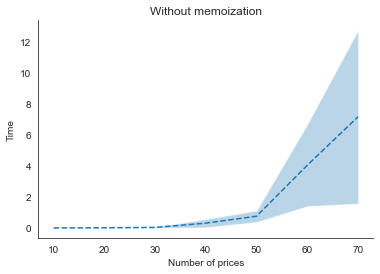

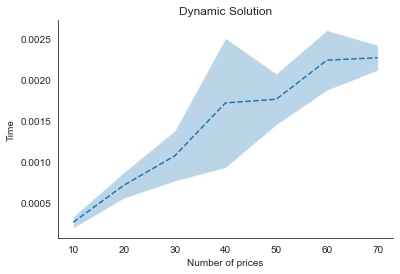

In [79]:
t, std = np.mean(times,axis = 2), np.std(times,axis = 2)


names = ["Without memoization", "Dynamic Solution"]
x = [10*(x+1) for x in range(n)]

for i in range(2):
    plt.fill_between(x,t[:,i]-std[:,i],t[:,i]+std[:,i],alpha=0.3)
    plt.plot(x,t[:,i],'--')
    plt.xlabel("Number of prices")
    plt.ylabel("Time")
    plt.title(names[i])
    sns.despine()
    plt.show()
